# Exploratory data analysis for single day ticket tracker
# plotsV0 -- create heat map of release date availability

## Written by Nicholas Fasano
## Created on: 04/20/2023

In [12]:
# Load in python packages
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

import datetime
import time

import os

# User defined function for rounding times to the nearest 'delta' minute

In [13]:
def convert_time(dt,delta):
    # input: 1) dt (datetime.time object)
    #        2) delta (int): minute incrment to round the time to (e.g. 1 rounds to nearest minute, 15 to nearest quarter hour)
    # otput  1) dt (datetime.time object): rounded to the nearest delta minute
    minute = dt.minute + dt.second/60
    dt = dt.replace(second=0)
    rounded_min = np.int(np.round(minute/delta,0)*delta)
    # must return a minute value between 0 and 59 and an hour value between 0 and 23
    if(rounded_min == 60):
        dt = dt.replace(minute=0)
        if(dt.hour == 23):
            dt = dt.replace(minute=59)
        else:
            dt = dt.replace(hour=dt.hour+1)
    else:
        dt = dt.replace(minute=rounded_min)
        
    return dt

# Load in all pickle files as dataframes and concatenate them

In [14]:
Dir = 'C:\\Users\\Nick\\Documents\\DataScience\\Webscrapers\\colosseum\\pickle_files\\'

# create a list of all .pkl files scraped from single day code
file_list = [f for f in os.listdir(Dir) if os.path.isfile(Dir+'/'+f) and '_single_day' in f and '.pkl' in f] 

# load in all pickle files and concat them
df = []
for j in range(len(file_list)):
    df.append(pd.read_pickle(Dir + file_list[j]))
df = pd.concat(df) 

df.head()

,Color,09:00,09:05,09:10,09:15,09:20,09:25,09:30,09:35,09:40,...,08:10,08:15,08:20,08:25,08:30,08:35,08:40,08:45,08:50,08:55
05/05/2023_23:51:44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
05/05/2023_23:51:58_FEUA_,green,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
05/05/2023_23:52:01_FEA_,green,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
05/05/2023_23:52:05_FEUAG_,red,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
05/05/2023_23:52:06_FEUA_,green,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data preprocessing to create heatmaps

## First clean up dataframe from all NaNs

In [15]:
# Only retain rows where tickets were available, then drop color axis
df = df[df['Color'] == 'green'].drop(['Color'],axis=1)

# Only retain ticket time slots where tickets where available
df = df[df.columns[df.sum() > 0]]

# convert from sparse dataframe to dense dataframe
df = df.fillna(0).sparse.to_dense()

# create times and ticket_type columns from index
df['times'] = [ind[ind.find(':')-2:ind.find(':')+6] for ind in df.index]
df['times'] = pd.to_datetime(df['times']).dt.time
df['ticket_type'] = [ht[ht.find('_')+10:-1] for ht in df.index]

# only retain a subset of ticket_types if desired
df = df.query('ticket_type == "FEUA" or ticket_type == "FEUAG" or ticket_type == "FEA"')
df = df.drop('ticket_type',axis=1)

# set index to times
df = df.set_index('times').copy()

In [16]:
df.head()

,09:00,09:15,09:30,09:35,10:25,10:30,10:35,10:45,11:25,11:35,...,16:05,16:15,16:25,16:35,16:45,17:00,17:15,17:35,17:45,17:55
times,,,,,,,,,,,,,,,,,,,,,
23:51:58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23:52:01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
23:52:06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23:52:10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
23:52:14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Second group nearby query times (by max) and ticket entry times (by sum)

In [17]:
# create copy of df
df_final = df.copy()

# time window to group query times and ticket times
delta_min_ticket = 30 # minute
delta_min_query = 30 # minute

# ===========================================

# group ticket entry times by summing ticket counts within 30 minute preiods
time_list = [datetime.time(hour=int(jtime[0:jtime.find(':')]),minute=int(jtime[3:])) for jtime in df_final.columns]
time_list = [convert_time(jtime,delta_min_ticket) for jtime in time_list]
df_final.columns = time_list
df_final = df_final.groupby(df_final.columns,axis=1).sum()

# group query times by taking the max ticket count over a 30 minute period
df_final['times2'] = [convert_time(jtimes,delta_min_query) for jtimes in df_final.index]
df_final = df_final.loc[df_final.sum(axis=1) > 0]
df_final = df_final.groupby('times2').max().copy()

# ===========================================

# zero fill query times according to grouped interval
time_list = [str(i*datetime.timedelta(minutes=delta_min_query)) for i in range(3*60//delta_min_query,13*60//delta_min_query)]
time_list = ['0' + time[:-3] if ':' in time[0:2] else time[:-3] for time in time_list ]
time_list = [datetime.time(hour=int(jtime[0:jtime.find(':')]),minute=int(jtime[3:])) for jtime in time_list]
df_final = df_final.join(pd.DataFrame(index=timeLst),on=df_final.index,how='outer',sort=True).set_index('key_0')
df_final.index.rename('times2',inplace=True)

# zero fill ticket entry times according to grouped interval
time_list = [str(i*datetime.timedelta(minutes=delta_min_ticket)) for i in range(9*60//delta_min_ticket,18*60//delta_min_ticket)]
time_list = ['0' + time[:-3] if ':' in time[0:2] else time[:-3] for time in time_list ]
time_list = [datetime.time(hour=int(jtime[0:jtime.find(':')]),minute=int(jtime[3:])) for jtime in time_list]
for jtime in time_list:
    if(jtime not in list(df_final.columns)):
        df_final[jtime] = np.nan
        
# sort query in ascending time order and replace NaNs with 0
df_final = df_final.reindex(sorted(df_final.columns), axis=1).replace(np.nan,0)

# convert index from local time ([EST]) to Rome time ([CET])
df_final.index = [datetime.datetime(1,1,1,jtime.hour,jtime.minute,jtime.second) + datetime.timedelta(hours=6) for jtime in df_final.index]
df_final.index = [jtime.time() for jtime in df_final.index]

In [18]:
df_final.head()

,09:00:00,09:30:00,10:00:00,10:30:00,11:00:00,11:30:00,12:00:00,12:30:00,13:00:00,13:30:00,14:00:00,14:30:00,15:00:00,15:30:00,16:00:00,16:30:00,17:00:00,17:30:00,18:00:00
06:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
09:30:00,11.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10:00:00,23.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10:30:00,10.0,10.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11:00:00,8.0,1.0,0.0,119.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Finally create heatmap

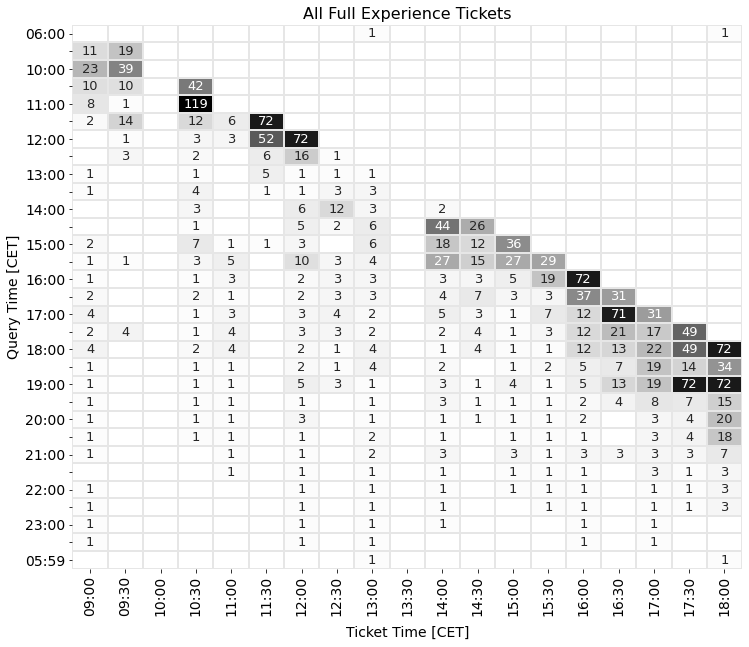

In [19]:
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(data=df_final.replace(0,np.nan),vmin=0,vmax=80,cmap=sns.color_palette("gray_r", as_cmap=True),
            cbar=False,annot=True,linewidth=1,linecolor=[0.9,0.9,0.9],fmt='g',annot_kws={"size":13})


ylabels = [jylabel.get_text()[0:5] for jylabel in ax.get_yticklabels()]
ylabels[1::2] = ['']*len(ylabels[1::2])
ax.set_yticklabels(ylabels,fontdict={'fontsize':14});

xlabels = [jxlabel.get_text()[0:5] for jxlabel in ax.get_xticklabels()]
ax.set_xticklabels(xlabels,fontdict={'fontsize':14});

ax.set_xlabel("Ticket Time [CET]",fontdict={'fontsize':14},labelpad=10)
ax.set_ylabel("Query Time [CET]",fontdict={'fontsize':14});
ax.set_title("All Full Experience Tickets",fontdict={'fontsize':16});

# plt.savefig('single_day_plotsV0\FullExperience.png', dpi=300)